In [4]:
import os
import cv2
import config
import argparse
import mimetypes
import imutils
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

%matplotlib inline
from matplotlib import pyplot as plt

In [5]:
def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
    
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
    
	# return the intersection over union value
	return iou

In [6]:
# Argument parser
"""ap = argparse.ArgumentParser()
ap.add_argument('-i', '--input', required=True, help='path to input image/text file of image filenames')
args = vars(ap.parse_args())

filetype = mimetypes.guess_type(args['input'])[0]
imagePaths = [args['input']]"""
imagePath = 'dataset/train/000002_01_01_162.png'

# coordinates real image
realSX = 229
realSY = 256
realEX = 245
realEY = 273

# if the file type is a text file, then we need to process multiple images
"""if 'text/plain' == filetype:
    filenames = open(args['input']).read().strip().split('\n')
    imagePaths = []

    for f in filenames:
        p = os.path.sep.join([config.test_image, f])
        imagePaths.append(p)
"""
print("[INFO] loading object detector...")
model = load_model(config.model_detector)
print(imagePath)

"""for imagePath in imagePaths:
    print(imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)"""

image = load_img(imagePath, target_size=(224, 224))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)

# make bounding box predictions on the input image
pred = model.predict(image)[0]
(startX, startY, endX, endY) = pred

# load the input image
image = cv2.imread(imagePath)
image = imutils.resize(image, width=600)
(h, w) = image.shape[:2]

# scale the predicted bounding box coordinates based on the image dimensions
startX = int(startX * h)
startY = int(startY * w)
endX = int(endX * h)
endY = int(endY * w)

boxA = [startX, startY, endX, endY]
boxB = [realSX, realSY, realEX, realEY]

print(boxA)
print(boxB)

# draw the predicted bounding box on the image
im = cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 2)
# draw the real bounding box on the image
im = cv2.rectangle(im, (realSX, realSY), (realEX, realEY), (0, 255, 0), 2)

# compute the intersection over union and display it
iou = bb_intersection_over_union(boxA, boxB)

[INFO] loading object detector...
dataset/train/000002_01_01_162.png
[240, 234, 307, 290]
[229, 256, 245, 273]


dataset/train/000002_01_01_162.png: 0.0265


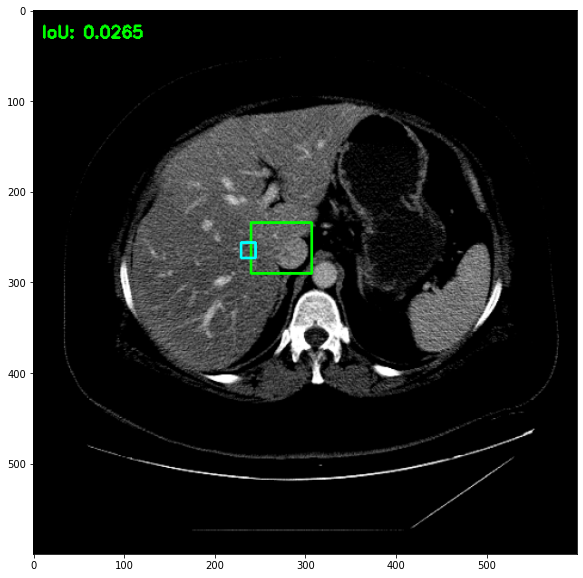

In [7]:
cv2.putText(image, "IoU: {:.4f}".format(iou), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
print("{}: {:.4f}".format(imagePath, iou))

# show the outputs image
#cv2.imshow('Output', im)
#cv2.waitKey()
#cv2.destroyWindow('Output') #make sure window closes cleanly

#Show the image with matplotlib
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()